https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html

https://jovian.com/beekaysh/eda-on-books-project

Task

a.	To access two books or novels and perform the following task

i	Obtain most frequent words distribution,

ii	average chapter length

iii	most frequent phrases (bi, tri and quadgrams), names of characters, places

b.	To select a dataset from real world example having reviews of any firm/product/books/hotel reviews etc and perform the following tasks

i	Read the dataset which is in csv or excel format

ii	Understand the dataset, comprehend and formulate problem statement for the given dataset

iii	Perform EDA on the dataset


In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
#Import necessary packages
from nltk.corpus import gutenberg
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
from string import punctuation
from nltk.corpus import stopwords


In [ ]:
#Function to attach POS tag letter as needed by wordnet lemmatizer
def pos_tagger(word):
    nltk_tag = nltk.pos_tag([word])[0][1][0]
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [ ]:
#Function to do basic preprocessing steps like lower casing, text tokenize, stop word removal, punctuation removal, stemming
def text_preprocessing(corpus):
    text_lower=corpus.lower()
    text_tokenize= word_tokenize(text_lower)

    #Creating list of common punctuation marks
    punctuations= [",", ".", "!","'", "-", "_"]
    #Remove punctuations
    text_punc=[]
    for word in text_tokenize:
        if word not in punctuations:
            text_punc.append(word)

    #Stopword Removal
    stopWords = set(stopwords.words('english'))
    #Remove stop words
    text_stop=[]
    for word in text_punc:
        if word not in stopWords:
            text_stop.append(word)

    #Apply stemming using porter stemmer
    porter =PorterStemmer()
    text_stem=[]
    for word in text_stop:
        text_stem.append(porter.stem(word))

    #Apply lemmatization using wordnet lemmatizer on word after stop word removal
    lemmatizer= WordNetLemmatizer()
    text_lemma=[]
    for word in text_stop:
        tag= pos_tagger(word)
        if tag==None:
            text_lemma.append(lemmatizer.lemmatize(word))
        else:
            text_lemma.append(lemmatizer.lemmatize(word,tag))

    return text_lower, text_tokenize, text_punc, text_stop, text_stem, text_lemma

In [ ]:
#Read a novel from gutenberg website
from urllib import request
url = "https://www.gutenberg.org/cache/epub/42671/pg42671.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(type(raw))
print(raw[0:1000])

<class 'str'>
﻿The Project Gutenberg eBook of Pride and Prejudice
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Pride and Prejudice


Author: Jane Austen

Editor: R. W. Chapman

Release date: May 9, 2013 [eBook #42671]

Language: English



*** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***

E-text prepared by Greg Weeks, Jon Hurst, Mary Meehan, and the Online
Distributed Proofreading Team (http://www.pgdp.net) from page images
generously made available by Internet Archive (https://archive.org)



Note: Project Gutenberg also has an HTML version of this


In [ ]:
#Python3 code to demonstrate working of
# Word location in String
# Using findall() + index()
import re



# initializing word
word = 'CHAPTER'

# Word location in String
# Using findall() + index()
test_str = raw.split()
res = -1
for idx in test_str:
    if len(re.findall(word, idx)) > 0:
        res = test_str.index(idx) + 1

# printing result
print("The location of word is : " + str(res))

The location of word is : 263


In [ ]:
#To know how many chapters are there in the novel
raw.count("CHAPTER")

61

In [ ]:
#Convert string to list of words
text_tokenize= word_tokenize(raw)
punctuation=list(punctuation)
#Remove punctuations
text_punc=[]
for word in text_tokenize:
    if word not in punctuation:
        text_punc.append(word)

#Remove stop words
stopwords = stopwords.words('english')
text_stop=[]
for word in text_punc:
    if word not in stopwords:
        text_stop.append(word)


In [ ]:
fdist1 = nltk.FreqDist(text_stop)

print(len(fdist1))

7470


In [ ]:
fdist1

FreqDist({'I': 2052, "''": 1910, '``': 1618, 'Mr.': 745, '--': 651, 'Elizabeth': 632, "'s": 598, 'could': 512, 'would': 464, 'Darcy': 408, ...})

In [ ]:
fdistDict=dict(fdist1)

In [ ]:
len(fdistDict)

7470

In [ ]:
fdistDict100={}
for key,value in fdistDict.items():
  if value>200:
    fdistDict100.update({key:value})

In [ ]:
print(len(fdistDict100))

33


In [ ]:
fdistDict100

{'You': 209,
 'Jane': 288,
 "'s": 598,
 '``': 1618,
 "''": 1910,
 'I': 2052,
 'It': 250,
 'must': 314,
 'one': 281,
 'Mr.': 745,
 'Bennet': 320,
 'said': 402,
 'But': 320,
 'Mrs.': 338,
 'know': 235,
 'much': 322,
 'Bingley': 300,
 'soon': 215,
 'think': 210,
 'would': 464,
 'though': 212,
 'She': 321,
 'The': 282,
 'He': 236,
 'Elizabeth': 632,
 'never': 213,
 'time': 201,
 'every': 264,
 'could': 512,
 'Darcy': 408,
 'Miss': 281,
 '--': 651,
 'sister': 210}

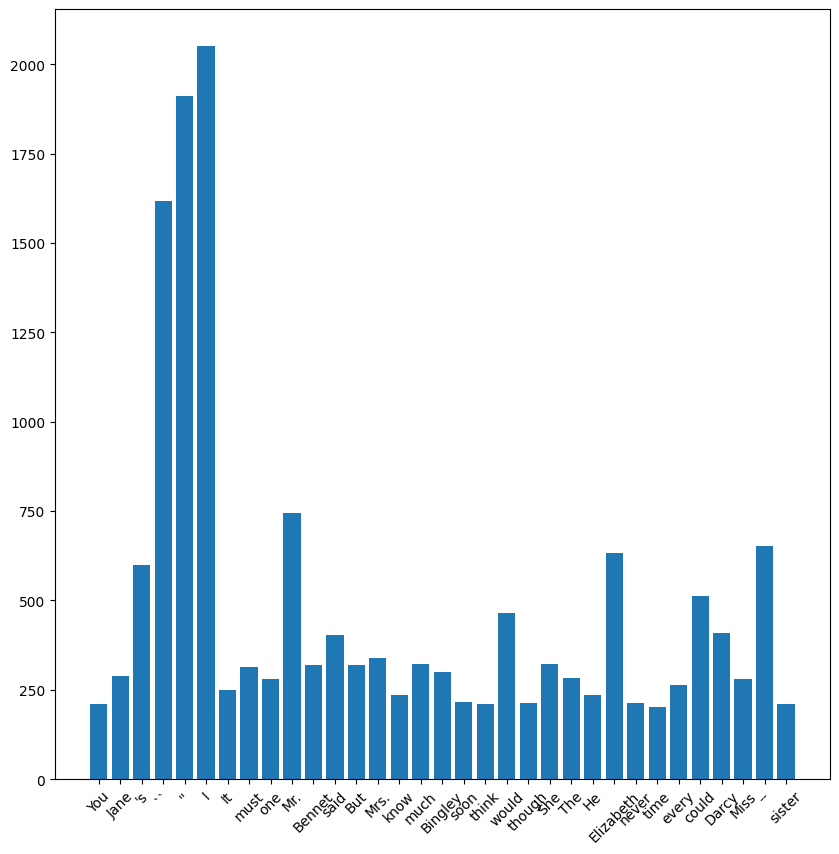

In [ ]:
import matplotlib.pyplot as plt
names = list(fdistDict100.keys())
values = list(fdistDict100.values())
plt.figure(figsize=(10,10))
plt.bar(range(len(fdistDict100)), values, tick_label=names)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Total words in the book

total_words=len(raw.split())
print(total_words)

125007


In [ ]:
#Total chapters in the book
total_chapters=raw.count("CHAPTER")
print(total_chapters)

61


In [ ]:
#Averge chapter length
avg_chap_words= total_words/total_chapters
print(avg_chap_words)

2049.2950819672133


In [ ]:
#Find ngrams



In [ ]:
## using count vectorizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
text="Good morning Mumbai. Good Morning India"
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform([text])

In [ ]:
count_array = count_matrix.toarray()

In [ ]:
count_array

array([[2, 1, 2, 1]])

In [ ]:
coun_vect.get_feature_names_out()

array(['good', 'india', 'morning', 'mumbai'], dtype=object)